In [9]:
import numpy as np

from ase import Atoms
from ase.io.trajectory import Trajectory
from ase.calculators.emt import EMT

a = 4  # approximate lattice constant
b = a / 2
au = Atoms('Au',
           cell=[(0, b, b), (b, 0, b), (b, b, 0)],
           pbc=1,
           calculator=EMT())  # use EMT potential
cell = au.get_cell()
traj = Trajectory('Au.traj', 'w')
for x in np.linspace(0.90, 1.10, 10):
    au.set_cell(cell * x, scale_atoms=True)
    au.get_potential_energy()
    traj.write(au)

175.26011715677134 GPa


<AxesSubplot:title={'center':'sj: E: -0.001 eV, V: 16.676 Å$^3$, B: 175.260 GPa'}, xlabel='volume [Å$^3$]', ylabel='energy [eV]'>

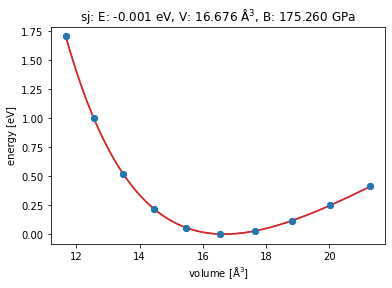

In [10]:
from ase.io import read
from ase.units import kJ
from ase.eos import EquationOfState
configs = read('Au.traj@0:10')  # read 5 configurations
# Extract volumes and energies:
volumes = [au.get_volume() for au in configs]
energies = [au.get_potential_energy() for au in configs]
eos = EquationOfState(volumes, energies)
v0, e0, B = eos.fit()
print(B / kJ * 1.0e24, 'GPa')
eos.plot('Au-eos.pdf')
eos.plot('Au-eos.png')